In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from statsmodels.formula.api import OLS
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import levene
from statsmodels.stats.diagnostic import het_breuschpagan
pd.options.mode.chained_assignment = None

In [3]:
df = pd.read_csv('C:\\Users\\tilleymusprime\\Desktop\\mcclean1.csv')

In [4]:
#In this workbook, we will be looking at the center position
c = df[df['Position'] == 'C']

In [5]:
ccols = list(c.columns.values)
print(ccols)

['Unnamed: 0', 'Acceleration', 'Agility', 'Awareness', 'Ball Carrier Vision', 'Block Shedding', 'Carrying', 'Catch In Traffic', 'Catching', 'Elusiveness', 'Finesse Moves', 'Hit Power', 'Impact Blocking', 'Injury', 'Juke Move', 'Jumping', 'Man Coverage', 'Name', 'Overall Rating', 'Pass Block', 'Play Action', 'Play Recognition', 'Position', 'Power Moves', 'Press', 'Pursuit', 'Release', 'Route Running', 'Run Block', 'Spectacular Catch', 'Speed', 'Spin Move', 'Stamina', 'Stiff Arm', 'Strength', 'Tackle', 'Team', 'Throw Accuracy Deep', 'Throw Accuracy Mid', 'Throw Accuracy Short', 'Throw Power', 'Throw on the Run', 'Toughness', 'Trucking', 'Zone Coverage', 'Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']


In [6]:
ccorr = c.corr()

In [7]:
cpos = ccorr[ccorr['Overall Rating'] >= 0.5]

In [8]:
cneg = ccorr[ccorr['Overall Rating'] <= -0.5]

In [9]:
print(cpos['Overall Rating'], cneg['Overall Rating'])
#These are the significant positive correlations
#There are no significant negtaive correlations

Awareness          0.878254
Impact Blocking    0.761854
Overall Rating     1.000000
Pass Block         0.811518
Run Block          0.698693
Name: Overall Rating, dtype: float64 Series([], Name: Overall Rating, dtype: float64)


In [10]:
#Now we will do some vif testing to make sure there isn't any multicollinearity
csig = c[['Awareness', 'Impact Blocking', 'Pass Block', 'Run Block']]
X = add_constant(csig)
pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])],
         index=X.columns)
#All of our variables have a vif score below 5 so we will move on to the summary statistic testing

const              350.087631
Awareness            2.006302
Impact Blocking      2.063656
Pass Block           1.825780
Run Block            1.525715
dtype: float64

In [11]:
C = sm.OLS(c['Overall Rating'], csig).fit()
print(C.summary())
#It doesn't look like Impact Blocking is significant.  Let's remove it and run the model again

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.155e+04
Date:                Sat, 21 Jul 2018   Prob (F-statistic):          1.50e-190
Time:                        00:54:16   Log-Likelihood:                -295.75
No. Observations:                 132   AIC:                             599.5
Df Residuals:                     128   BIC:                             611.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Awareness           0.3923      0.019     

In [12]:
csig1 = c[['Awareness', 'Pass Block', 'Run Block']]

In [13]:
C1 = sm.OLS(c['Overall Rating'], csig1).fit()
print(C1.summary())
#Removing Impact Blocking lowered the AIC score by 2 points
#All of our variables appear to be signifcant based on our p-values
#Accodring to our Durbin watson statsitic, there is no autocorrelation present in the model

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.236e+04
Date:                Sat, 21 Jul 2018   Prob (F-statistic):          7.08e-193
Time:                        00:54:20   Log-Likelihood:                -295.81
No. Observations:                 132   AIC:                             597.6
Df Residuals:                     129   BIC:                             606.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Awareness      0.3950      0.017     23.514      0.0

In [17]:
def model():
    pv = (0.395*c['Awareness'])+(0.3362*c['Pass Block'])+(0.2182*c['Run Block'])
    return pv

In [18]:
c['Predicted Value'] = model()

In [19]:
c['Residual'] = c['Predicted Value'] - c['Overall Rating']

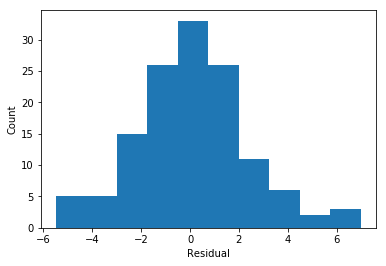

In [20]:
plt.hist(c['Residual'])
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()
#These residuals looks pretty evenly distributed

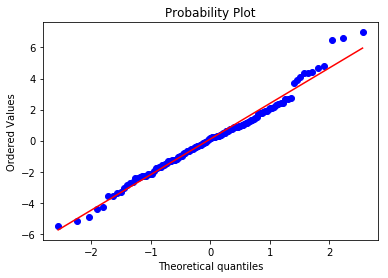

In [21]:
stats.probplot(c['Residual'], plot=plt)
plt.show()
#The residuals appear to be evenly distributed

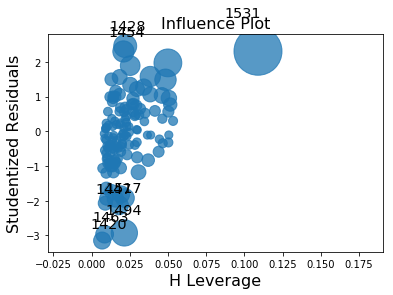

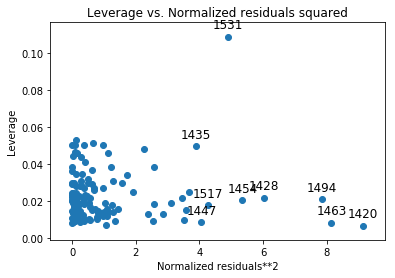

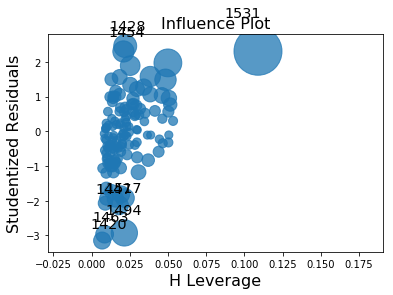

In [22]:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(C1)
influence_plot(C1)
#We will try and run the model with out the point 3242 and see how that affects it.  That point has high leverage and residual

In [25]:
cunleveraged1 = c.drop(df.index[1531])
cunleveraged1.shape
#It looks like we successfully removed the row with the high leverage, high residual points
#Let's retest our model with this new data

(131, 54)

In [26]:
c.shape
#It looks like we successfully removed the high influence point

(132, 54)

In [28]:
print(C1.summary())

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.236e+04
Date:                Sat, 21 Jul 2018   Prob (F-statistic):          7.08e-193
Time:                        00:55:25   Log-Likelihood:                -295.81
No. Observations:                 132   AIC:                             597.6
Df Residuals:                     129   BIC:                             606.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Awareness      0.3950      0.017     23.514      0.0

In [29]:
cclean = cunleveraged1[['Overall Rating','Awareness', 'Pass Block', 'Run Block']]
ccleansig = cunleveraged1[['Awareness', 'Pass Block', 'Run Block']]
C2 = sm.OLS(cclean['Overall Rating'], ccleansig).fit()
print(C2.summary())
#It looks like removing the leverage point decreased the AIC score
#It also introduced a little more skew and kurtosis (though not a significant amount)
#We will use the original model going forward

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.328e+04
Date:                Sat, 21 Jul 2018   Prob (F-statistic):          3.43e-192
Time:                        00:55:26   Log-Likelihood:                -291.40
No. Observations:                 131   AIC:                             588.8
Df Residuals:                     128   BIC:                             597.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Awareness      0.3890      0.017     23.250      0.0

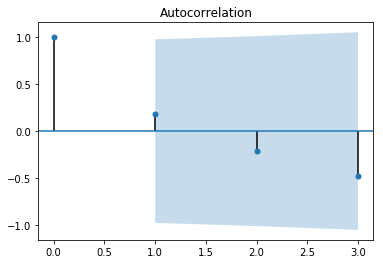

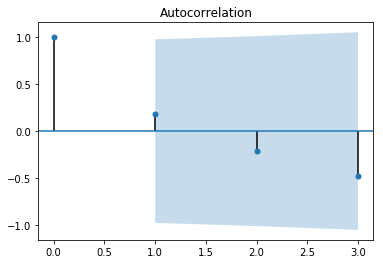

In [30]:
#WE will check for autocorrelation again as well
ccorr1 = c[['Overall Rating','Awareness', 'Pass Block', 'Run Block']].corr()
plot_acf(ccorr1['Overall Rating'])
#There does not appear to be any significant amounts of autocorrelation in the model

In [31]:
#Finally, before we do the actual testing, we will check for heteroskedasticity
het_breuschpagan(c['Residual'], csig1)
#Based on the low p-values, we can say there is no heteroskedasticity

(39.46543114879465,
 2.692715765402871e-09,
 18.33923862688495,
 5.685052413085047e-10)

In [ ]:
##Finally, we are ready to test our model with the trian test split


In [32]:
X_train, X_test, y_train, y_test = train_test_split(csig1, c['Overall Rating'], test_size = 0.3, random_state =42)

In [33]:
reg = LinearRegression()

In [34]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
y_pred = reg.predict(X_test)

In [36]:
ccv = cross_val_score(reg, csig1, c['Overall Rating'], cv =5)

In [37]:
ccv_mean = np.mean(ccv)

In [38]:
print(ccv, ccv_mean)
#It looks like on average, our model explained 96.4% of the variation in the data

[0.9861577  0.97354518 0.97162168 0.92510456 0.9649895 ] 0.96428372113769


In [39]:
cdesc = c[['Overall Rating','Awareness', 'Pass Block', 'Run Block']]
cdesc1 = cdesc.describe()

In [44]:
cdesc1.to_csv('C:\\Users\\tilleymusprime\\Desktop\\csig.csv')